# Online Retail

In [2]:
# Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [3]:
df = pd.read_excel("Online_Retail.xlsx")

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df=df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]

In [6]:
df.head(5)

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


In [7]:
# Data Preprocessing
df.isnull().sum()

CustomerID     135080
InvoiceNo           0
StockCode           0
Quantity            0
UnitPrice           0
Description      1454
InvoiceDate         0
Country             0
dtype: int64

In [8]:
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=5,column='TotalAmount',value=TotalAmount)

In [9]:
TotalAmount.head(10)

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
5    15.30
6    25.50
7    11.10
8    11.10
9    54.08
dtype: float64

In [10]:
new_df = df[['CustomerID','InvoiceNo','StockCode','Quantity','TotalAmount','InvoiceDate','Country']]

new_df2 = df.copy()

In [11]:
new_df.head(5)

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom


In [12]:
country_price = new_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


<Axes: xlabel='Country'>

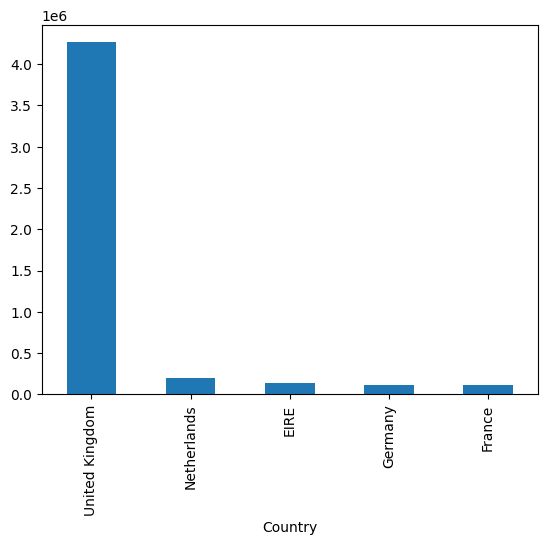

In [13]:
# Top 5 Companies 
country_price[:5].plot(kind = 'bar')

<Axes: xlabel='Country'>

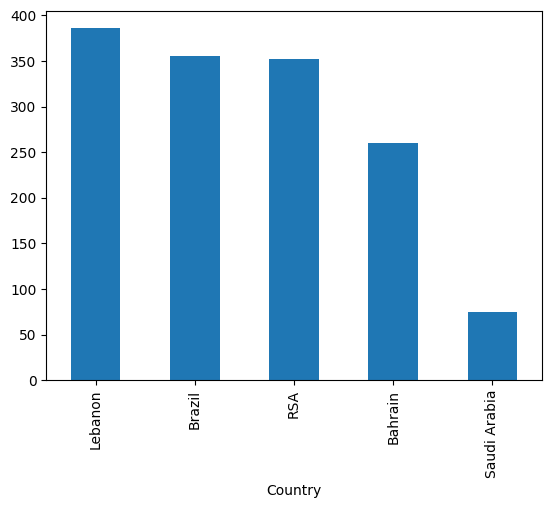

In [14]:
# 5 Compaies with least number of purchase
country_price[33:].plot(kind = 'bar')


In [15]:
timest = new_df['InvoiceDate'].dt.year

new_df['Year'] = timest

new_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3700\3162078452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = timest


,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,Year
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2010
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,2010
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2010
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,2010
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,2010


<Axes: xlabel='Year'>

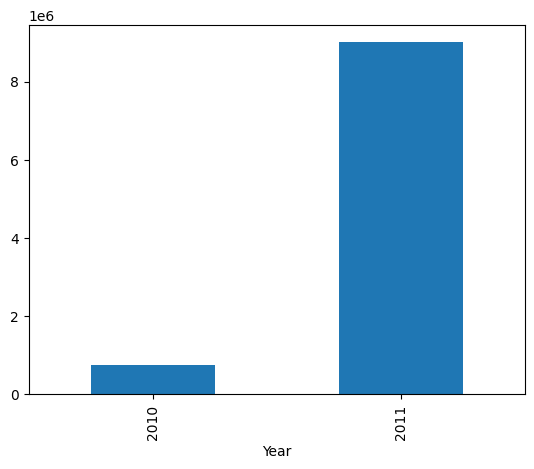

In [16]:
# Total sales for different years

new_df.groupby('Year')['TotalAmount'].sum().plot(kind = 'bar')

<Axes: title={'center': 'Sales month wise'}, xlabel='Mon,Year'>

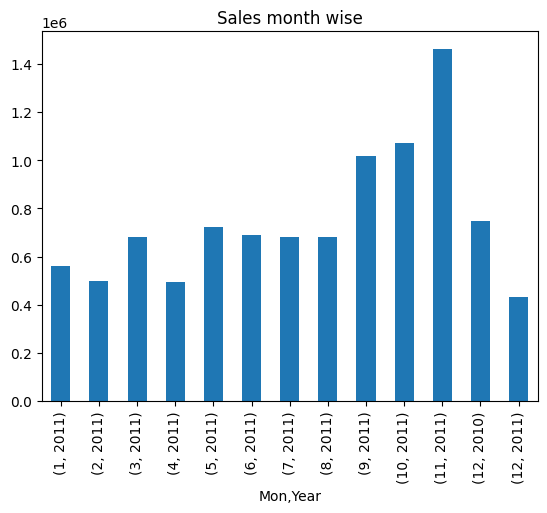

In [17]:
# Sales for different months

new_df['Mon'] = new_df['InvoiceDate'].dt.month
new_df['month'] = new_df['InvoiceDate'].dt.month_name() 
new_df.groupby(['Mon','Year'])['TotalAmount'].sum().plot(kind = 'bar', title = 'Sales month wise')

In [18]:
# Checking why dec 2011 has a drop comparing to nov 2011
get_2011 = new_df[(new_df['Year'] == 2011)]
get_dec2011 = get_2011[(new_df['month'] == 'December')]
get_dec2011 = get_dec2011['InvoiceDate'].dt.date.unique()
get_dec2011

C:\Users\Admin\AppData\Local\Temp\ipykernel_3700\2588636060.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  get_dec2011 = get_2011[(new_df['month'] == 'December')]


array([datetime.date(2011, 12, 1), datetime.date(2011, 12, 2),
       datetime.date(2011, 12, 4), datetime.date(2011, 12, 5),
       datetime.date(2011, 12, 6), datetime.date(2011, 12, 7),
       datetime.date(2011, 12, 8), datetime.date(2011, 12, 9)],
      dtype=object)

In [19]:
new_df.head(6)

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,Year,Mon,month
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2010,12,December
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2010,12,December
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
5,17850.0,536365,22752,2,15.30,2010-12-01 08:26:00,United Kingdom,2010,12,December


In [20]:
# removes all rows that contain null values in the specified column
new_df = new_df.dropna()


In [21]:
new_df.isnull().sum()

CustomerID     0
InvoiceNo      0
StockCode      0
Quantity       0
TotalAmount    0
InvoiceDate    0
Country        0
Year           0
Mon            0
month          0
dtype: int64

<Axes: title={'center': 'Most Customers for country'}, xlabel='Country'>

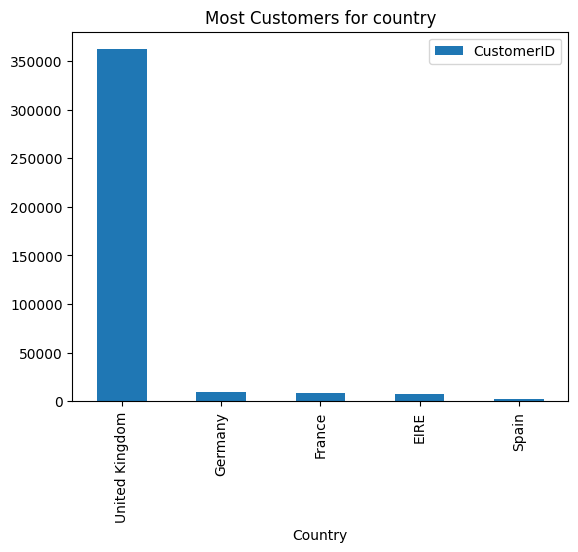

In [22]:
#Countries with more number of customers
cus_id = pd.DataFrame(new_df.groupby('Country')['CustomerID'].count().sort_values(ascending = False))
cus_id[:5].plot(kind = 'bar', title = 'Most Customers for country')

<Axes: title={'center': 'Least customers for country'}, xlabel='Country'>

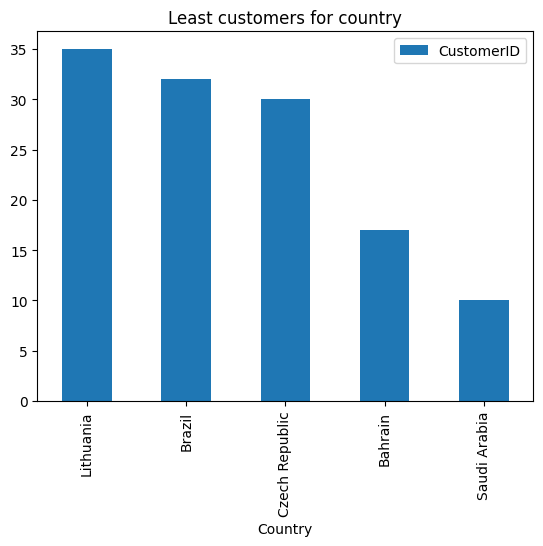

In [23]:
# Countries with less number of customers
cus_id[-5:].plot(kind = 'bar', title = 'Least customers for country')

In [24]:
# Removing the null values since we are checking the data based on customer and description
new_df2 = new_df2.dropna()
new_df2.isnull().sum()
new_df2.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


In [45]:
# Sales Average of each product

avg_sales = new_df2.groupby(['StockCode','Description'])[['Quantity','TotalAmount']].mean().sort_values(by = 'Quantity',ascending = False)
avg_sales

,,Quantity,TotalAmount
StockCode,Description,,
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
84568,GIRLS ALPHABET IRON ON PATCHES,520.000000,97.200000
84826,ASSTD DESIGN 3D PAPER STICKERS,368.702703,9.145405
18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,325.333333,21.320000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000
...,...,...,...
21412,VINTAGE GOLD TINSEL REEL,-6.000000,-2.520000
79323W,WHITE CHERRY LIGHTS,-8.000000,-54.000000
21144,PINK POODLE HANGING DECORATION,-12.000000,-4.560000


In [31]:
new_df.to_excel("C:\\Users\\Admin\\Desktop\\clean_retail_data.xlsx",index=False)

In [34]:
avg_sales.to_excel("C:\\Users\\Admin\\Desktop\\Sales _Average_of_each_product.xlsx",index=False)